In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [3]:
import os
currdir = os.getcwd()
os.listdir(currdir)

['.ipynb_checkpoints',
 '740_1375_compressed_Chicago_Crimes_2001_to_2004.csv.zip',
 '740_1375_compressed_Chicago_Crimes_2005_to_2007.csv.zip',
 '740_1375_compressed_Chicago_Crimes_2008_to_2011.csv.zip',
 'aclImdb',
 'aclImdb.zip',
 'CaliforniPricePrediction.ipynb',
 'Car Price Prediction.ipynb',
 'Car_Purchasing_Data.csv',
 'ChicagoCrimeRatePredictions.ipynb',
 'cifar-10-python.tar.gz',
 'CIFAR10.ipynb',
 'cifar10_model_1.h5',
 'Codalab',
 'datasets',
 'glove.6B.zip',
 'gloveDir',
 'Hackerearth',
 'jena_climate_2009_2016.csv',
 'jena_climate_2009_2016.csv.zip',
 'Kaggle',
 'MNIST Dataset classification.ipynb',
 'pre_trained_glove_model.h5',
 'TemperatureForecasting.ipynb',
 'Untitled.ipynb']

In [4]:
##unzipping files
def unzipfile(path_to_zip_file,directory_to_extract_to):
    import zipfile
    with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
        zip_ref.extractall(directory_to_extract_to)

In [5]:
chicago_crimes_2001_to_2004 =  os.path.join(currdir , '740_1375_compressed_Chicago_Crimes_2001_to_2004.csv.zip')
chicago_crimes_2005_to_2007 = os.path.join(currdir ,'740_1375_compressed_Chicago_Crimes_2005_to_2007.csv.zip')
chicago_crimes_2008_to_2011 = os.path.join(currdir ,'740_1375_compressed_Chicago_Crimes_2008_to_2011.csv.zip' )

In [7]:
unzipfile(chicago_crimes_2001_to_2004 , currdir)
unzipfile(chicago_crimes_2005_to_2007 , currdir)
unzipfile(chicago_crimes_2008_to_2011 , currdir)

In [9]:
dataset_2001_to_2004 = pd.read_csv(chicago_crimes_2001_to_2004,error_bad_lines=False)
dataset_2005_to_2007 = pd.read_csv(chicago_crimes_2005_to_2007,error_bad_lines=False)
dataset_2008_to_20011 = pd.read_csv(chicago_crimes_2008_to_2011,error_bad_lines=False)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
C:\Users\Nikhil\anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [12]:
dataset_2001_to_2004.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Year,Longitude
count,1.923515e+06,1.923515e+06,1.923515e+06,1.923513e+06,1.223383e+06,1.223268e+06,1.892824e+06,1.923515e+06,1.892823e+06
mean,4.455517e+06,2.450314e+06,1.217773e+03,1.134669e+01,2.246317e+01,3.725664e+01,1.164549e+06,2.002354e+03,-8.767167e+01
std,6.692676e+05,7.662898e+05,7.086507e+02,6.977792e+00,1.392668e+01,2.146987e+01,1.617451e+04,1.795053e+00,5.880068e-02
min,8.790000e+02,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.178983e+01,-9.168657e+01
25%,3.931944e+06,1.819338e+06,6.240000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153269e+06,2.001000e+03,-8.771252e+01
50%,4.475318e+06,2.414899e+06,1.114000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.165916e+06,2.002000e+03,-8.766638e+01
75%,4.957632e+06,3.017702e+06,1.813000e+03,1.700000e+01,3.300000e+01,5.600000e+01,1.176269e+06,2.003000e+03,-8.762885e+01
max,6.254041e+06,1.081375e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,2.004000e+03,-8.752453e+01


In [13]:
chicago_dataset = pd.concat([dataset_2001_to_2004,dataset_2005_to_2007,dataset_2008_to_20011])

In [14]:
chicago_dataset.head(20)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"
5,3633,4838048,HM440266,08/01/2004 12:01:00 AM,012XX S HARDING AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,APARTMENT,False,...,24.0,29.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
6,3756,4791194,HM403711,01/01/2001 11:00:00 AM,114XX S ST LAWRENCE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,...,9.0,50.0,02,1182247.0,1.82938e+06,2001.0,08/29/2006 03:46:28 AM,41.687,-87.608445,"(41.687020002, -87.60844523)"
7,4502,4679521,HM216293,03/15/2003 12:00:00 AM,090XX S RACINE AVE,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,...,21.0,73.0,26,1169911.0,1.84483e+06,2003.0,04/15/2016 08:55:02 AM,41.7297,-87.653159,"(41.729712374, -87.653158513)"
8,4564,4792195,HM405396,09/16/2004 10:00:00 AM,003XX W HUBBARD ST,0890,THEFT,FROM BUILDING,RESIDENCE,False,...,42.0,8.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
9,4904,4680124,HM282389,01/01/2003 12:00:00 AM,009XX S SPAULDING AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,24.0,29.0,06,1154521.0,1.89576e+06,2003.0,04/15/2016 08:55:02 AM,41.8698,-87.708180,"(41.869772159, -87.708180162)"


In [15]:
chicago_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6484568 entries, 0 to 2688709
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          object 
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              object 
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [16]:
chicago_dataset.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Year,Longitude
count,6.484568e+06,6.484568e+06,6.484568e+06,6.484478e+06,5.784358e+06,5.782517e+06,6.416078e+06,6.484568e+06,6.416077e+06
mean,2.531266e+06,5.101298e+06,1.208221e+03,1.132404e+01,2.255808e+01,3.782135e+01,1.164468e+06,2.006273e+03,-8.767198e+01
std,1.893801e+06,2.054924e+06,7.065525e+02,6.953385e+00,1.378068e+01,2.159690e+01,1.729256e+04,3.112746e+00,6.252628e-02
min,0.000000e+00,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.178983e+01,-9.168657e+01
25%,1.016829e+06,3.345181e+06,6.240000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152947e+06,2.004000e+03,-8.771379e+01
50%,1.827400e+06,5.326133e+06,1.112000e+03,1.000000e+01,2.200000e+01,3.300000e+01,1.165894e+06,2.007000e+03,-8.766652e+01
75%,4.364696e+06,6.880743e+06,1.733000e+03,1.700000e+01,3.400000e+01,5.800000e+01,1.176316e+06,2.009000e+03,-8.762868e+01
max,6.254267e+06,1.082723e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,2.011000e+03,-8.752453e+01


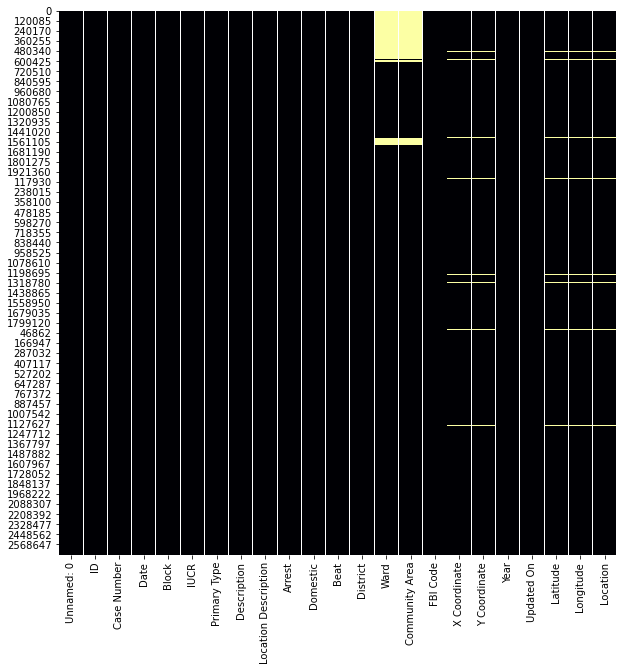

In [20]:
plt.figure(figsize = (10,10))
sns.heatmap(chicago_dataset.isnull() , cbar = False , cmap = "inferno")

In [25]:
chicago_dataset.drop(['Unnamed: 0','Case Number','ID','IUCR','Beat','Ward','X Coordinate','Y Coordinate','Updated On','FBI Code' , 'Year' , 'Community Area','Location' , 'District' , 'Latitude' , 'Longitude'] ,inplace = True,axis = 1)

In [26]:
chicago_dataset.head(15)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
5,08/01/2004 12:01:00 AM,012XX S HARDING AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,APARTMENT,False,False
6,01/01/2001 11:00:00 AM,114XX S ST LAWRENCE AVE,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True
7,03/15/2003 12:00:00 AM,090XX S RACINE AVE,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,False
8,09/16/2004 10:00:00 AM,003XX W HUBBARD ST,THEFT,FROM BUILDING,RESIDENCE,False,False
9,01/01/2003 12:00:00 AM,009XX S SPAULDING AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False


In [28]:
chicago_dataset['Date'] = pd.to_datetime(chicago_dataset['Date'] , format = '%m/%d/%Y %H:%M:%S %p')

In [29]:
chicago_dataset.Date

0         2004-01-01 12:01:00
1         2003-03-01 12:00:00
2         2004-06-20 11:00:00
3         2004-12-30 08:00:00
4         2003-05-01 01:00:00
                  ...        
2688705   2008-10-06 12:01:00
2688706   2008-10-06 12:01:00
2688707   2008-10-05 10:32:00
2688708   2008-10-06 05:20:00
2688709   2008-10-06 11:00:00
Name: Date, Length: 6484568, dtype: datetime64[ns]

In [48]:
chicago_dataset.index = pd.DatetimeIndex(chicago_dataset.Date)

In [49]:
chicago_dataset.head(15)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2004-01-01 12:01:00,2004-01-01 12:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
2003-03-01 12:00:00,2003-03-01 12:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2004-06-20 11:00:00,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
2004-12-30 08:00:00,2004-12-30 08:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
2003-05-01 01:00:00,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
2004-08-01 12:01:00,2004-08-01 12:01:00,012XX S HARDING AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,APARTMENT,False,False
2001-01-01 11:00:00,2001-01-01 11:00:00,114XX S ST LAWRENCE AVE,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True
2003-03-15 12:00:00,2003-03-15 12:00:00,090XX S RACINE AVE,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,False
2004-09-16 10:00:00,2004-09-16 10:00:00,003XX W HUBBARD ST,THEFT,FROM BUILDING,RESIDENCE,False,False


In [50]:
columns = chicago_dataset.columns

In [51]:
columns

Index(['Date', 'Block', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic'],
      dtype='object')

In [52]:
chicago_dataset['Primary Type'].value_counts()

THEFT                               1311046
BATTERY                             1179016
CRIMINAL DAMAGE                      767545
NARCOTICS                            750191
OTHER OFFENSE                        404048
ASSAULT                              390372
BURGLARY                             387561
MOTOR VEHICLE THEFT                  309410
ROBBERY                              243140
DECEPTIVE PRACTICE                   205436
CRIMINAL TRESPASS                    192454
PROSTITUTION                          78768
WEAPONS VIOLATION                     60196
PUBLIC PEACE VIOLATION                45426
OFFENSE INVOLVING CHILDREN            40043
SEX OFFENSE                           23822
CRIM SEXUAL ASSAULT                   23045
GAMBLING                              16594
LIQUOR LAW VIOLATION                  15560
ARSON                                 10880
INTERFERENCE WITH PUBLIC OFFICER       9515
KIDNAPPING                             6657
HOMICIDE                        

In [53]:
top_crime_types = chicago_dataset['Primary Type'].value_counts().iloc[:15].index

In [54]:
top_crime_types

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE',
       'ASSAULT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object')

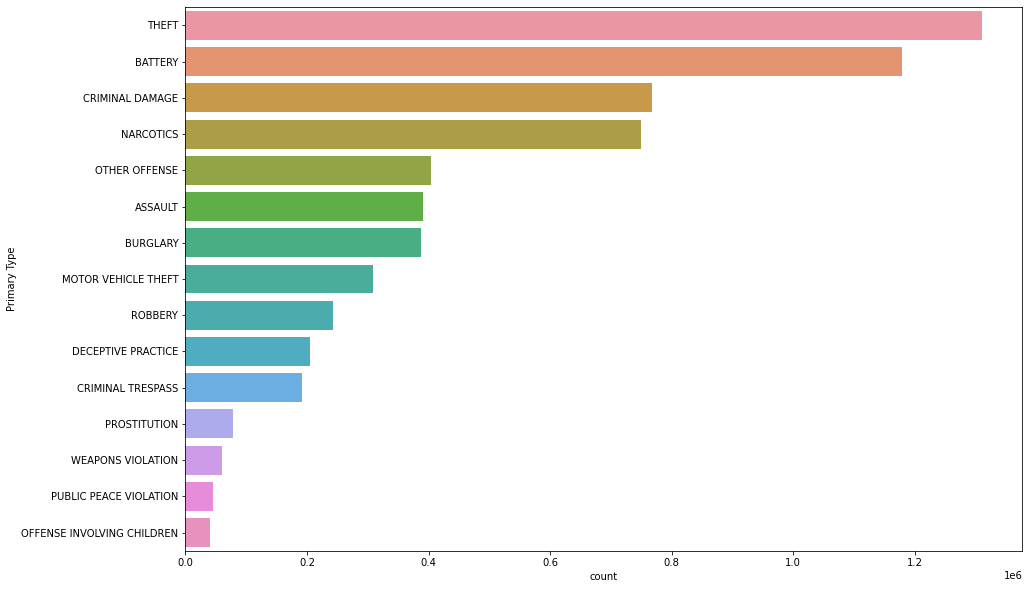

In [55]:
plt.figure(figsize = (15,10))
sns.countplot(y = 'Primary Type' , data = chicago_dataset , order = top_crime_types)

In [56]:
chicago_dataset['Location Description']

Date
2004-01-01 12:01:00    RESIDENCE
2003-03-01 12:00:00    RESIDENCE
2004-06-20 11:00:00    RESIDENCE
2004-12-30 08:00:00        OTHER
2003-05-01 01:00:00    RESIDENCE
                         ...    
2008-10-06 12:01:00        HOUSE
2008-10-06 12:01:00        HOUSE
2008-10-05 10:32:00      CTA BUS
2008-10-06 05:20:00       STREET
2008-10-06 11:00:00         AUTO
Name: Location Description, Length: 6484568, dtype: object

In [57]:
top_crime_locations = chicago_dataset['Location Description'].value_counts().iloc[:15].index

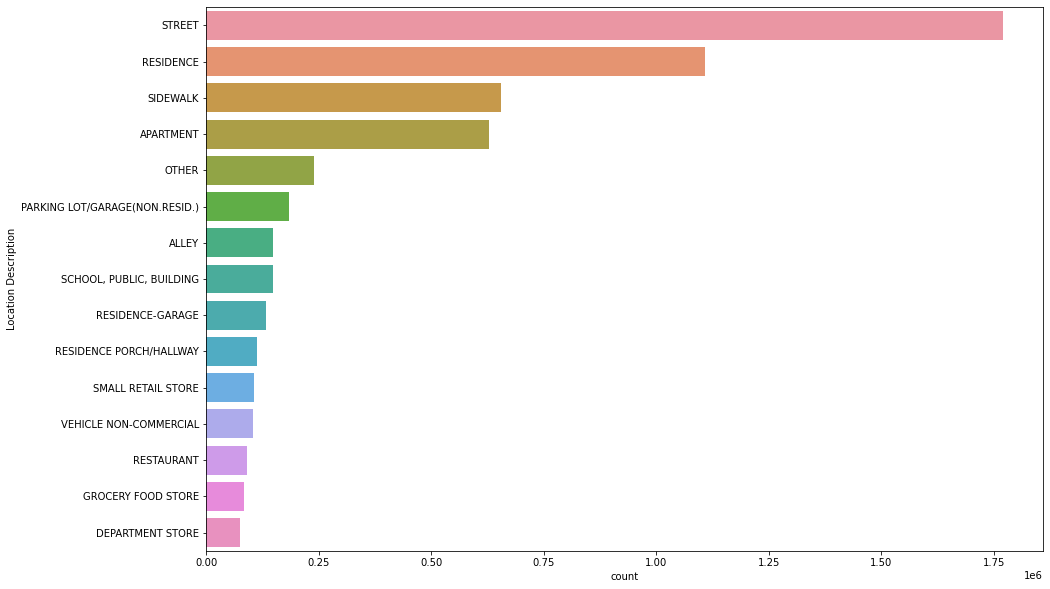

In [58]:
plt.figure(figsize = (15,10))
sns.countplot(y = 'Location Description' , data = chicago_dataset , order = top_crime_locations)

In [59]:
chicago_dataset.resample('Y').size()

Date
2001-12-31    568518
2002-12-31    490879
2003-12-31    475913
2004-12-31    388205
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

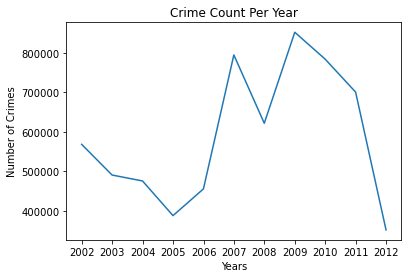

In [60]:
plt.plot(chicago_dataset.resample('Y').size())
plt.title('Crime Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

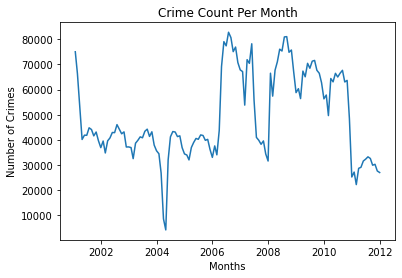

In [61]:
plt.plot(chicago_dataset.resample('M').size())
plt.title('Crime Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

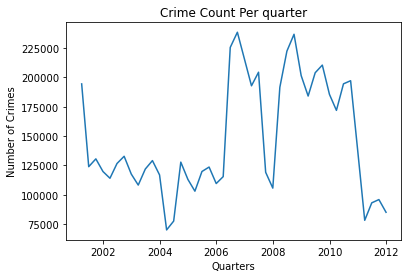

In [62]:
plt.plot(chicago_dataset.resample('Q').size())
plt.title('Crime Count Per quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

In [63]:
chicago_prophet = chicago_dataset.resample('M').size().reset_index()

In [64]:
chicago_prophet

,Date,0
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
127,2011-08-31,32616
128,2011-09-30,29945
129,2011-10-31,30305
130,2011-11-30,27653


In [65]:
chicago_prophet.columns = ['Date','Crime Count']

In [66]:
chicago_prophet

,Date,Crime Count
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
127,2011-08-31,32616
128,2011-09-30,29945
129,2011-10-31,30305
130,2011-11-30,27653


In [67]:
chicago_prophet_final = chicago_prophet.rename(columns = {'Date':'ds','Crime Count':'y'})

In [68]:
chicago_prophet_final

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
127,2011-08-31,32616
128,2011-09-30,29945
129,2011-10-31,30305
130,2011-11-30,27653


In [71]:
prophet = Prophet()
prophet.fit(chicago_prophet_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [76]:
future_predictions = prophet.make_future_dataframe(periods = 365*2)
forecast = prophet.predict(future_predictions)

In [77]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,41869.918337,21913.304939,61250.566617,41869.918337,41869.918337,-264.846184,-264.846184,-264.846184,-264.846184,-264.846184,-264.846184,0.0,0.0,0.0,41605.072153
1,2001-02-28,41979.917120,15945.954980,55753.178413,41979.917120,41979.917120,-6204.072640,-6204.072640,-6204.072640,-6204.072640,-6204.072640,-6204.072640,0.0,0.0,0.0,35775.844480
2,2001-03-31,42101.701487,20365.626951,60633.234411,42101.701487,42101.701487,-1731.995882,-1731.995882,-1731.995882,-1731.995882,-1731.995882,-1731.995882,0.0,0.0,0.0,40369.705605
3,2001-04-30,42219.557326,22140.732549,62627.958227,42219.557326,42219.557326,-955.050713,-955.050713,-955.050713,-955.050713,-955.050713,-955.050713,0.0,0.0,0.0,41264.506612
4,2001-05-31,42341.341692,26947.942992,69649.164845,42341.341692,42341.341692,5347.929697,5347.929697,5347.929697,5347.929697,5347.929697,5347.929697,0.0,0.0,0.0,47689.271389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,2013-12-26,57258.549286,28628.692113,67829.592289,57172.960072,57345.703509,-9069.473144,-9069.473144,-9069.473144,-9069.473144,-9069.473144,-9069.473144,0.0,0.0,0.0,48189.076142
858,2013-12-27,57261.008748,29081.805725,67113.496229,57175.286639,57348.438432,-9238.156455,-9238.156455,-9238.156455,-9238.156455,-9238.156455,-9238.156455,0.0,0.0,0.0,48022.852293
859,2013-12-28,57263.468210,28658.010273,67307.094576,57177.613207,57351.052100,-9374.382416,-9374.382416,-9374.382416,-9374.382416,-9374.382416,-9374.382416,0.0,0.0,0.0,47889.085794
860,2013-12-29,57265.927671,27169.656562,67217.851263,57179.939774,57353.665768,-9473.470055,-9473.470055,-9473.470055,-9473.470055,-9473.470055,-9473.470055,0.0,0.0,0.0,47792.457617


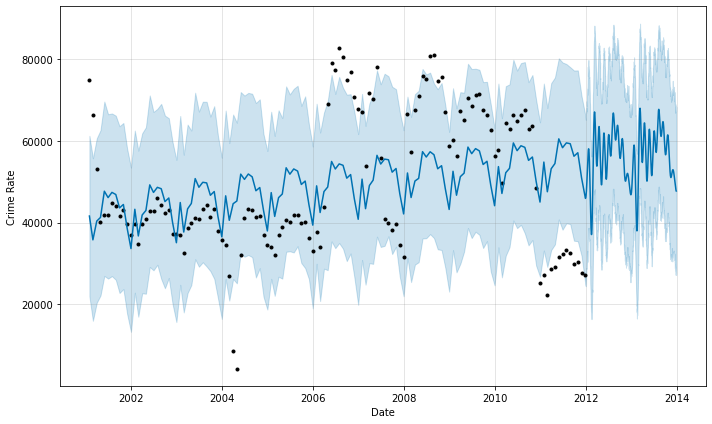

In [78]:
figure = prophet.plot(forecast , xlabel = 'Date' , ylabel = 'Crime Rate')

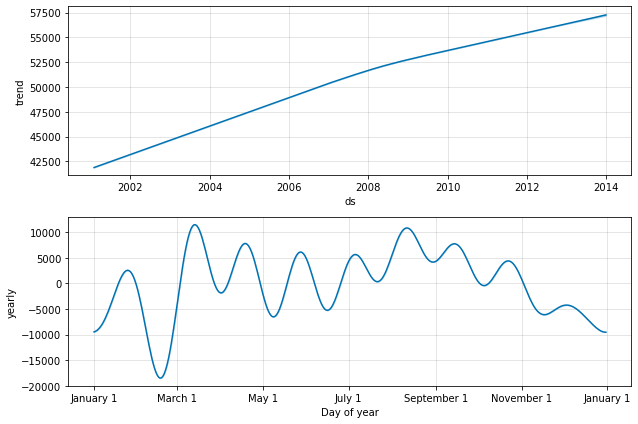

In [79]:
figure = prophet.plot_components(forecast)